Challenge for TitanicML at 16th July.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np 
#from sklearn import preprocessing

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(1919)
### Constants ###
data_folder = "/user/rh186032/datasciencecoursera/TitanicML/input/"
#out_folder = "/user/rh186032/datasciencecoursera/TitanicML/output/"
#batch_size = 4
#nb_epoch = 10

In [36]:
### load train and test ###
ds  = pd.read_csv(data_folder+'train.csv', index_col=0)
#ds  = pd.read_csv(data_folder+'train.csv', index_col=False)

In [37]:
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [38]:
ds.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [45]:
ds['Sex'].replace('female', 1, inplace=True)
ds['Sex'].replace('male', 2, inplace=True)

ds['Age'].fillna(ds['Age'].mean(), inplace=True)

ds.dropna(subset=['Fare', 'Embarked'], inplace=True, how='any')

ds['Embarked'].replace('S', 1, inplace=True)
ds['Embarked'].replace('C', 2, inplace=True)
ds['Embarked'].replace('Q', 3, inplace=True)

In [46]:
def normalize(column):
    return (column - column.mean()) / (column.max() - column.min())

In [47]:
age_norm = normalize(ds['Age'])
pclass_norm = normalize(ds['Pclass'])
sex_norm = normalize(ds['Sex'])
sibsp_norm = normalize(ds['SibSp'])
parch_norm = normalize(ds['Parch'])
embarked_norm = normalize(ds['Embarked'])
fare_norm = normalize(ds['Fare'])

In [53]:
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",2,22.000000,1,0,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2
3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",2,35.000000,0,0,373450,8.0500,NaN,1
6,0,3,"Moran, Mr. James",2,29.699118,0,0,330877,8.4583,NaN,3
7,0,1,"McCarthy, Mr. Timothy J",2,54.000000,0,0,17463,51.8625,E46,1
8,0,3,"Palsson, Master. Gosta Leonard",2,2.000000,3,1,349909,21.0750,NaN,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,1


In [54]:
X_train = np.asarray(pd.concat([age_norm, pclass_norm, sex_norm, sibsp_norm, parch_norm, embarked_norm, fare_norm], axis=1, join='inner'))
Y_train = np.asarray(ds['Survived'])

In [55]:
#To develop and shape our model for keras
model = Sequential()

model.add(Dense(output_dim=10, input_dim=7))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, input_dim=7)`
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [56]:
filepath = data_folder+'checkpoints/weights.best.hdf5'

In [57]:
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [58]:
#history = model.fit(X_train[:600], Y_train[:600], callbacks=callbacks_list, epochs=40, batch_size=32, verbose=0)
history = model.fit(x=X_train[:600], y=Y_train[:600], batch_size=64, epochs=64, verbose=1, 
                    callbacks=callbacks_list, 
                    validation_split=0.0, 
                    validation_data=None, 
                    shuffle=True, 
                    class_weight=None, 
                    sample_weight=None, 
                    initial_epoch = 0)

loss_history = history.history['loss']
acc_history = history.history['acc']
epochs = [(x + 1) for x in range(64)]

Epoch 1/64
600/600 [==============================] - 0s - loss: 1.1399 - acc: 0.6450     
Epoch 2/64
600/600 [==============================] - 0s - loss: 0.6344 - acc: 0.7067     
Epoch 3/64
600/600 [==============================] - 0s - loss: 0.5742 - acc: 0.7250     
Epoch 4/64
600/600 [==============================] - 0s - loss: 0.5515 - acc: 0.7250     
Epoch 5/64
600/600 [==============================] - 0s - loss: 0.5543 - acc: 0.7283     
Epoch 6/64
600/600 [==============================] - 0s - loss: 0.5405 - acc: 0.7317     
Epoch 7/64
600/600 [==============================] - 0s - loss: 0.5299 - acc: 0.7400     
Epoch 8/64
600/600 [==============================] - 0s - loss: 0.5402 - acc: 0.7350     
Epoch 9/64
600/600 [==============================] - 0s - loss: 0.5321 - acc: 0.7450     
Epoch 10/64
600/600 [==============================] - 0s - loss: 0.5264 - acc: 0.7533     
Epoch 11/64
600/600 [==============================] - 0s - loss: 0.5207 - acc: 0.7733   

In [59]:
ax = plt.subplot(211)
ax.plot(epochs, loss_history, color = 'red')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error Rate\n')
ax.set_title('Error Rate per Epoch\n')

ax2 = plt.subplot(212)
ax2.plot(epochs, acc_history, color='c')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy\n')
ax2.set_title('Accuracy per Epoch\n')

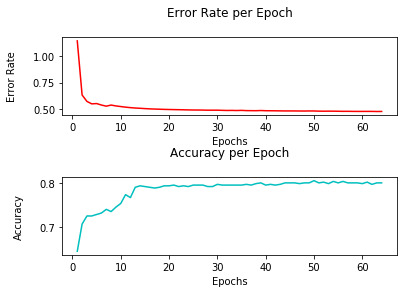

 32/289 [==>...........................] - ETA: 0s[0.43409458839150861, 0.80276816608996537]


In [60]:
plt.subplots_adjust(hspace=0.8)
plt.show()

X_test = X_train[600:]
Y_test = Y_train[600:]

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print(loss_and_metrics)

In [61]:
len(Y_train)

889

In [66]:
pd2 = pd.concat([ds[0],Y_train])

KeyError: 0

In [ ]:
import csv
f = open(data_folder+'output.csv', 'w')
writer = csv.writer(f, lineterminator='\n')

# データをリストに保持
f.write("PassengerId, Servives\n")
for i in range(len(Y_train)):
    row = "{},{}\n".format(
        ds['PassengerId'][0][i],
        Y_train[i]
    )
    f.write(row)

# 出力
#writer.writerow(Y_train.T)

# ファイルクローズ
f.close()